In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("heart_d.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df = pd.read_csv("heart_d.csv")
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [5]:
df.shape

(1025, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

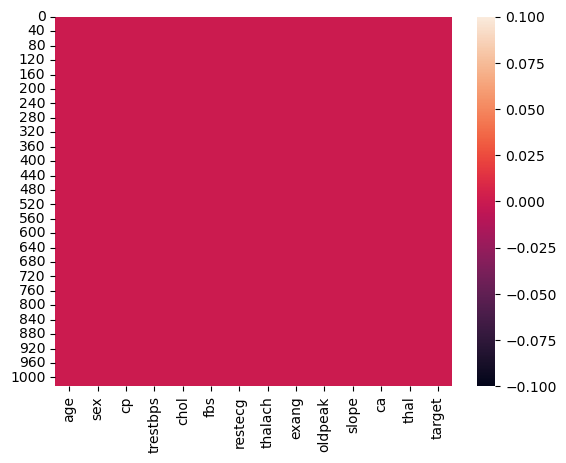

In [7]:
sns.heatmap(df.isnull())

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<Axes: >

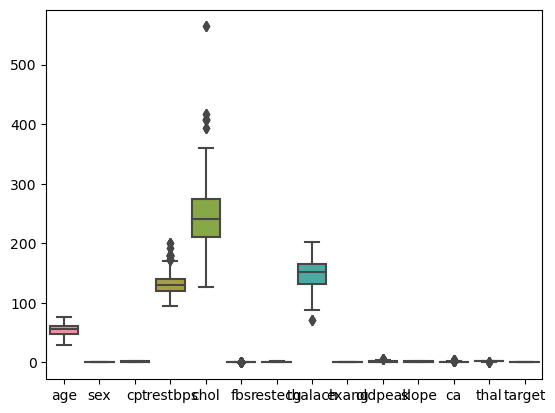

In [9]:
sns.boxplot(df)

In [10]:
Q1 = df.quantile(0.25)

Q1

In [11]:
Q1

age          48.0
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     132.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

In [12]:
Q3 = df.quantile(0.75)

In [13]:
Q3

age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        275.0
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.8
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64

In [14]:
IQR = Q3 - Q1
IQR

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

In [15]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [16]:
df.shape

(769, 14)

<Axes: >

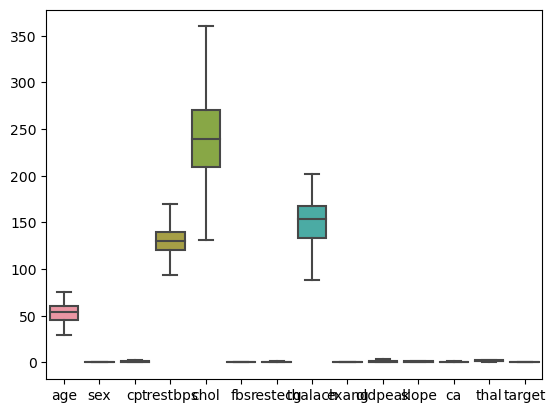

In [17]:
sns.boxplot(df)

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


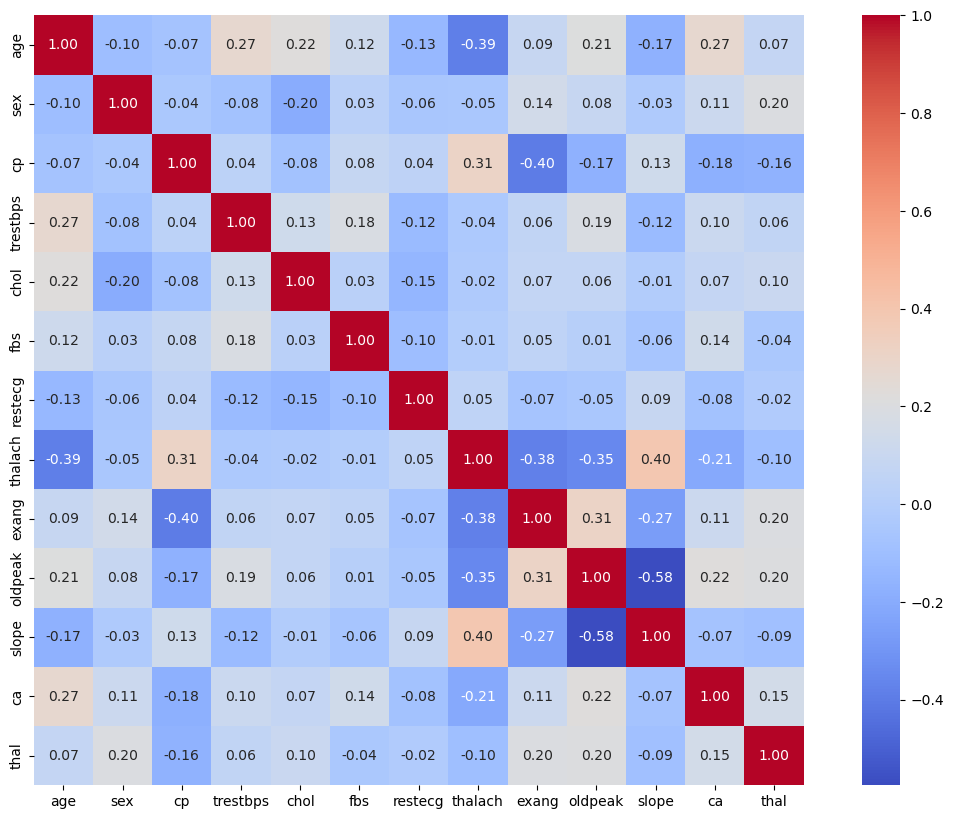

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('heart_d.csv')

# Drop non-numeric columns and the target column 'diagnosis' for correlation analysis
numeric_columns = data.drop(columns=['target']).select_dtypes(include=[np.number])

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Show plot
plt.show()


In [20]:
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

In [21]:
df.shape

(769, 14)

In [22]:
x=df.drop(columns=['target'])
y=df['target']

In [23]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [24]:
y

0       0
2       0
3       0
5       1
7       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 769, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=0)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
44,55,0,1,132,342,0,1,166,0,1.2,2,0,2
757,66,1,0,160,228,0,0,138,0,2.3,2,0,1
567,41,1,2,130,214,0,0,168,0,2.0,1,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
506,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2
263,55,0,1,132,342,0,1,166,0,1.2,2,0,2
851,37,1,2,130,250,0,1,187,0,3.5,0,0,2
760,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [27]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
887,57,1,0,110,201,0,1,126,1,1.5,1,0,1
167,57,0,0,120,354,0,1,163,1,0.6,2,0,2
153,54,1,2,120,258,0,0,147,0,0.4,1,0,3
21,67,0,0,106,223,0,1,142,0,0.3,2,2,2
858,68,0,2,120,211,0,0,115,0,1.5,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,61,0,0,130,330,0,0,169,0,0.0,2,0,2
224,51,1,0,140,261,0,0,186,1,0.0,2,0,2
259,66,1,0,120,302,0,0,151,0,0.4,1,0,2
558,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [28]:
y_train

44      1
757     1
567     1
1021    0
506     0
       ..
1019    1
263     1
851     1
760     0
915     0
Name: target, Length: 538, dtype: int64

In [29]:
y_test

887    1
167    1
153    1
21     1
858    1
      ..
670    0
224    1
259    1
558    1
381    0
Name: target, Length: 231, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [31]:
from sklearn.impute import SimpleImputer

# Replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)


In [32]:
from sklearn.impute import SimpleImputer

# Create the imputer with strategy='mean' or 'median'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Transform the test data using the imputer fitted on the training data
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [33]:
Training_Accuracy_L=[]
Test_Accuracy_L=[]
Sensitivity_L=[]
Specificity_L=[]
F1Score_L=[]
Precision_L=[]
Negative_Predictive_Value_L=[]
False_Negative_Rate_L=[]
False_Positive_Rate_L=[]
False_Discovery_Rate_L=[]
False_Omission_Rate_L=[]
average_cv_accuracy_L=[]

In [34]:
import math


def rounder(n):
  try:
    return math.ceil(n * 1000) / 1000
  except:
    return n

def fun(model,name):
  test_pred = model.predict(x_test)
  train_pred = model.predict(x_train)

  train_acc=rounder(accuracy_score(y_train,train_pred)*100)
  test_acc=rounder(accuracy_score(y_test,test_pred)*100)

  Training_Accuracy_L.append(train_acc)
  Test_Accuracy_L.append(test_acc)

  print("\nTraining Accuracy:", train_acc)
  print("\nTesting Accuracy:",test_acc)

  print(classification_report(y_test,test_pred))
  test_conf_matrix = confusion_matrix(y_test,test_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False)
  t=name+' Confusion Matrix - Test Set'
  plt.title(t)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  tn, fp,fn,tp = test_conf_matrix.ravel()

  Sensitivity=rounder((tp) / (tp + fn))
  Sensitivity_L.append(Sensitivity)

  Specificity=rounder((tn) / (tn + fp))
  Specificity_L.append(Specificity)

  F1Score=rounder( (2 * tp) / (2 * tp+ fp + fn))
  F1Score_L.append(F1Score)

  Precision=rounder((tp) / (tp +fp))
  Precision_L.append(Precision)

  Negative_Predictive_Value= rounder((tn) / (tn + fn))
  Negative_Predictive_Value_L.append(Negative_Predictive_Value)

  False_Negative_Rate=rounder((fn) / (fn + tp))
  False_Negative_Rate_L.append(False_Negative_Rate)

  False_Positive_Rate=rounder((fp) / (fp + tn))
  False_Positive_Rate_L.append(False_Positive_Rate)

  False_Discovery_Rate=rounder((fp) / (fp + tp))
  False_Discovery_Rate_L.append(False_Discovery_Rate)

  False_Omission_Rate=rounder((fn) / (fn+ tn))
  False_Omission_Rate_L.append(False_Omission_Rate)


  print('Sensitivity:', Sensitivity)
  print('Specificity:', Specificity)
  print('F1 Score:', F1Score)
  print('Precision:',Precision)
  print('Negative Predictive Value:', Negative_Predictive_Value)
  print('False Negative Rate:',False_Negative_Rate)
  print('False Positive Rate:',False_Positive_Rate)
  print('False Discovery Rate:',False_Discovery_Rate)
  print('False Omission Rate:', False_Omission_Rate)

  num_folds = 5
  kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
  cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
  print(f"\n{num_folds}-Fold Cross-Validation Scores:")
  print(cv_scores)
  average_cv_accuracy = rounder(np.mean(cv_scores))
  print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")
  average_cv_accuracy_L.append(average_cv_accuracy)



In [35]:
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming x_train, y_train, x_test, y_test are defined

# Create an SVM model
sv = svm.SVC(kernel='linear')

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model
sv.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_svm = sv.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

cv_linear_reg = cross_val_score(sv, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Support Vector Machine Accuracy: {cv_linear_reg.mean()*100}")

Accuracy: 0.8874458874458875
Cross-validated Support Vector Machine Accuracy: 84.39252336448598



Training Accuracy: 87.547

Testing Accuracy: 88.745
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        92
           1       0.90      0.92      0.91       139

    accuracy                           0.89       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.89      0.89      0.89       231



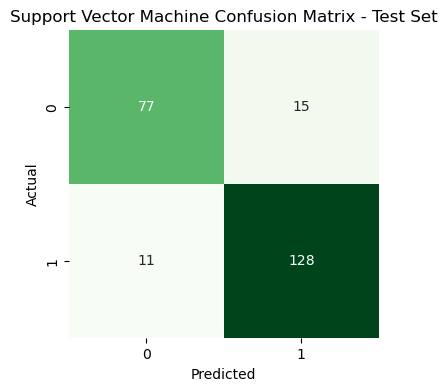

Sensitivity: 0.921
Specificity: 0.837
F1 Score: 0.908
Precision: 0.896
Negative Predictive Value: 0.875
False Negative Rate: 0.08
False Positive Rate: 0.164
False Discovery Rate: 0.105
False Omission Rate: 0.125

5-Fold Cross-Validation Scores:
[0.80555556 0.85185185 0.90740741 0.81308411 0.8411215 ]

Average Cross-Validation Accuracy: 84.40%


In [36]:
fun(sv,'Support Vector Machine')

In [37]:
from sklearn.linear_model import LogisticRegression

# Assuming x_train, y_train, x_test, y_test are defined

# Create a logistic regression model
log_reg = LogisticRegression()

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model
log_reg.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy)

cv_log_reg = cross_val_score(log_reg, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Logistic Regression Accuracy: {cv_log_reg.mean()*100}")


Accuracy: 0.8614718614718615
Cross-validated Logistic Regression Accuracy: 87.17203184492904



Training Accuracy: 87.547

Testing Accuracy: 86.148
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        92
           1       0.88      0.88      0.88       139

    accuracy                           0.86       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.86      0.86      0.86       231



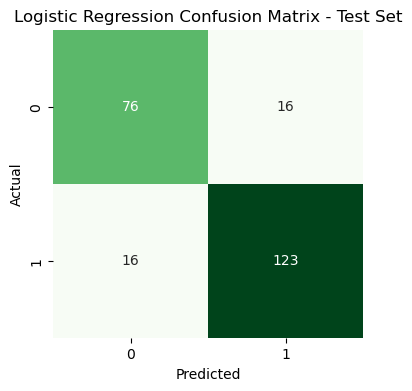

Sensitivity: 0.885
Specificity: 0.827
F1 Score: 0.885
Precision: 0.885
Negative Predictive Value: 0.827
False Negative Rate: 0.116
False Positive Rate: 0.174
False Discovery Rate: 0.116
False Omission Rate: 0.174

5-Fold Cross-Validation Scores:
[0.76851852 0.88888889 0.89814815 0.8411215  0.85046729]

Average Cross-Validation Accuracy: 85.00%


In [38]:
fun(log_reg,'Logistic Regression')

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(y_pred_dt.shape)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

cv_linear_reg = cross_val_score(dt, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Decision Tree Accuracy: {cv_linear_reg.mean()*100}")


(231,)
The accuracy score achieved using Decision Tree is: 100.0 %
Cross-validated Decision Tree Accuracy: 96.83627552786432



Training Accuracy: 100.0

Testing Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       139

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



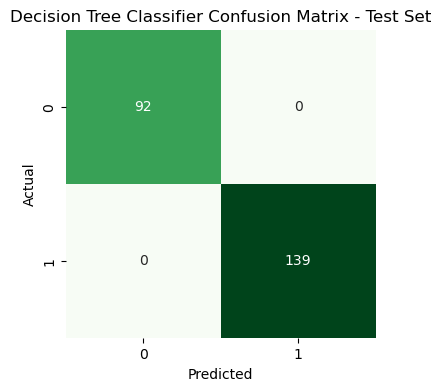

Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Omission Rate: 0.0

5-Fold Cross-Validation Scores:
[0.99074074 0.97222222 0.96296296 0.95327103 0.92523364]

Average Cross-Validation Accuracy: 96.10%


In [40]:
fun(dt,'Decision Tree Classifier')

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming x_train, y_train, x_test, y_test are defined

# Create a Gaussian Naive Bayes model
nb = GaussianNB()

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model
nb.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_nb = nb.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

cv_linear_reg = cross_val_score(nb, x_train_imputed, y_train, cv=5)
print(f"Cross-validated naive_bayes Accuracy: {cv_linear_reg.mean()*100}")


Accuracy: 0.8441558441558441
Cross-validated naive_bayes Accuracy: 84.01523018345449



Training Accuracy: 83.458

Testing Accuracy: 84.416
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        92
           1       0.89      0.85      0.87       139

    accuracy                           0.84       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.85      0.84      0.84       231



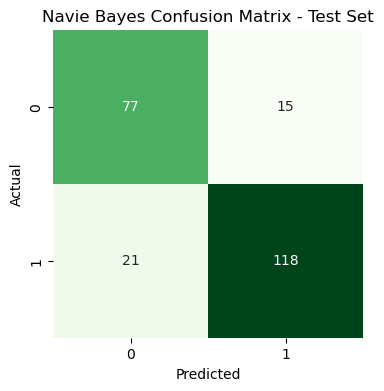

Sensitivity: 0.849
Specificity: 0.837
F1 Score: 0.868
Precision: 0.888
Negative Predictive Value: 0.786
False Negative Rate: 0.152
False Positive Rate: 0.164
False Discovery Rate: 0.113
False Omission Rate: 0.215

5-Fold Cross-Validation Scores:
[0.81481481 0.85185185 0.87962963 0.82242991 0.79439252]

Average Cross-Validation Accuracy: 83.30%


In [42]:
fun(nb,'Navie Bayes')

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming x_train, y_train, x_test, y_test are defined

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed

# Fit the model
rf.fit(x_train_imputed, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

cv_linear_reg = cross_val_score(rf, x_train_imputed, y_train, cv=5)
print(f"Cross-validated Random Forest Accuracy: {cv_linear_reg.mean()*100}")

Accuracy: 1.0
Cross-validated Random Forest Accuracy: 97.02319141571478



Training Accuracy: 100.0

Testing Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       139

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



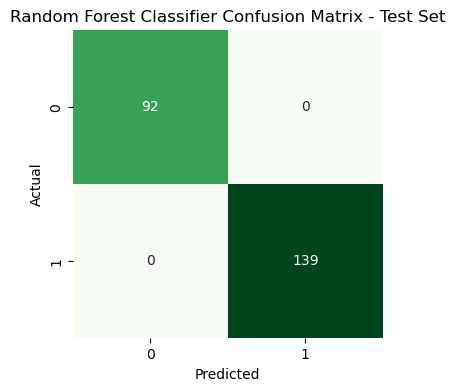

Sensitivity: 1.0
Specificity: 1.0
F1 Score: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.0
False Discovery Rate: 0.0
False Omission Rate: 0.0

5-Fold Cross-Validation Scores:
[0.97222222 0.97222222 0.98148148 0.94392523 0.99065421]

Average Cross-Validation Accuracy: 97.30%


In [44]:
fun(rf,'Random Forest Classifier')

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming x_train, y_train, x_test, y_test are defined

# Handling missing values if necessary (using SimpleImputer as an example)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Standardize the features (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the model
knn.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

cv_linear_reg = cross_val_score(knn, x_train_imputed, y_train, cv=5)
print(f"Cross-validated K Neighbours Classifier Accuracy: {cv_linear_reg.mean()*100}")


Accuracy: 0.8225108225108225
Cross-validated K Neighbours Classifier Accuracy: 70.80823814468674



Training Accuracy: 52.417

Testing Accuracy: 59.741
              precision    recall  f1-score   support

           0       0.47      0.10      0.16        92
           1       0.61      0.93      0.74       139

    accuracy                           0.60       231
   macro avg       0.54      0.51      0.45       231
weighted avg       0.55      0.60      0.51       231



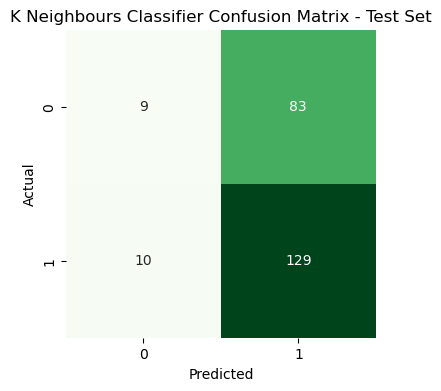

Sensitivity: 0.929
Specificity: 0.098
F1 Score: 0.736
Precision: 0.609
Negative Predictive Value: 0.474
False Negative Rate: 0.072
False Positive Rate: 0.903
False Discovery Rate: 0.392
False Omission Rate: 0.527

5-Fold Cross-Validation Scores:
[0.71296296 0.7037037  0.69444444 0.70093458 0.65420561]

Average Cross-Validation Accuracy: 69.40%


In [46]:
fun(knn,'K Neighbours Classifier')

In [47]:
from imblearn.over_sampling import SMOTE

# Assuming you have X_train, y_train, X_test, y_test defined before this point



In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier (Random Forest is used here, you can replace it with any classifier of your choice)
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = clf.predict(x_test_scaled)

# Calculate accuracy after applying SMOTE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying SMOTE:", accuracy)



Accuracy after applying SMOTE: 1.0


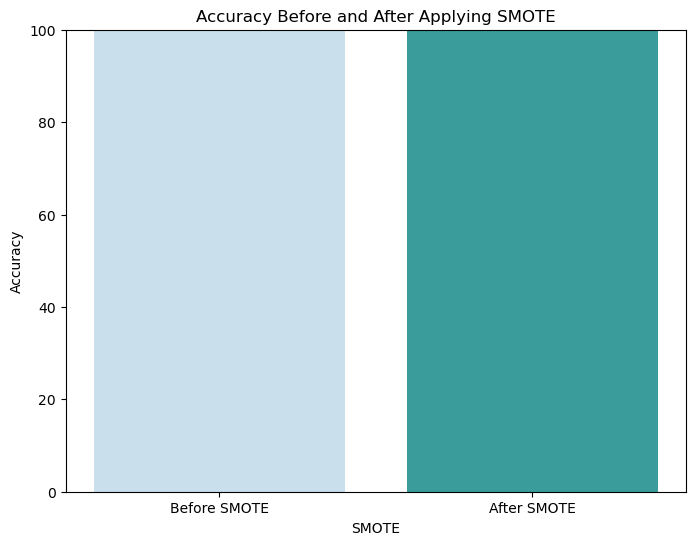

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a classifier without SMOTE
clf_no_smote = RandomForestClassifier(random_state=42)
clf_no_smote.fit(x_train_scaled, y_train)
y_pred_no_smote = clf_no_smote.predict(x_test_scaled)
accuracy_before_smote = accuracy_score(y_test, y_pred_no_smote)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier with SMOTE
clf_with_smote = RandomForestClassifier(random_state=42)
clf_with_smote.fit(x_train_resampled, y_train_resampled)
y_pred_with_smote = clf_with_smote.predict(x_test_scaled)
accuracy_after_smote = accuracy_score(y_test, y_pred_with_smote)

# Create lists for accuracy values and labels
accuracies = [accuracy_before_smote * 100, accuracy_after_smote * 100]
labels = ['Before SMOTE', 'After SMOTE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#C9DFEC', '#3B9C9C'])
plt.xlabel('SMOTE')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Applying SMOTE')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()



In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm.fit(x_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = svm.predict(x_test_scaled)

# Calculate accuracy after applying SMOTE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying SMOTE:", accuracy)


Accuracy after applying SMOTE: 0.8766233766233766


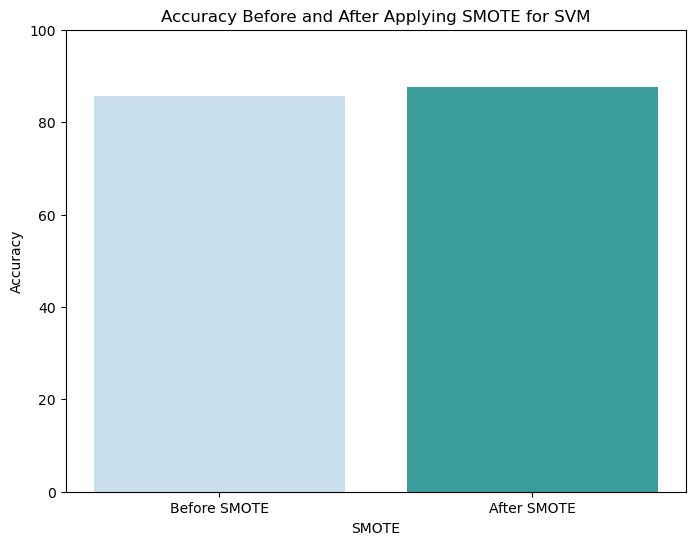

In [51]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a classifier without SMOTE
svm_no_smote = SVC(kernel='linear', random_state=42)
svm_no_smote.fit(x_train_scaled, y_train)
y_pred_no_smote = svm_no_smote.predict(x_test_scaled)
accuracy_before_smote = accuracy_score(y_test, y_pred_no_smote)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier with SMOTE
svm_with_smote = SVC(kernel='linear', random_state=42)
svm_with_smote.fit(x_train_resampled, y_train_resampled)
y_pred_with_smote = svm_with_smote.predict(x_test_scaled)
accuracy_after_smote = accuracy_score(y_test, y_pred_with_smote)

# Create lists for accuracy values and labels
accuracies = [accuracy_before_smote * 100, accuracy_after_smote * 100]
labels = ['Before SMOTE', 'After SMOTE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#C9DFEC', '#3B9C9C'])
plt.xlabel('SMOTE')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Applying SMOTE for SVM')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()


In [52]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a logistic regression classifier
lr = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
lr.fit(x_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = lr.predict(x_test_scaled)

# Calculate accuracy after applying SMOTE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying SMOTE:", accuracy)


Accuracy after applying SMOTE: 0.8636363636363636


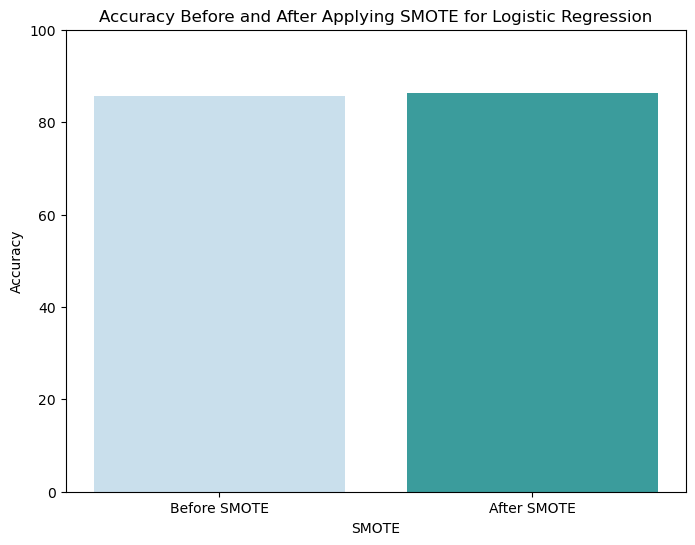

In [53]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a classifier without SMOTE
lr_no_smote = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
lr_no_smote.fit(x_train_scaled, y_train)
y_pred_no_smote = lr_no_smote.predict(x_test_scaled)
accuracy_before_smote = accuracy_score(y_test, y_pred_no_smote)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier with SMOTE
lr_with_smote = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
lr_with_smote.fit(x_train_resampled, y_train_resampled)
y_pred_with_smote = lr_with_smote.predict(x_test_scaled)
accuracy_after_smote = accuracy_score(y_test, y_pred_with_smote)

# Create lists for accuracy values and labels
accuracies = [accuracy_before_smote * 100, accuracy_after_smote * 100]
labels = ['Before SMOTE', 'After SMOTE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#C9DFEC', '#3B9C9C'])
plt.xlabel('SMOTE')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Applying SMOTE for Logistic Regression')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()


In [54]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = dt.predict(x_test_scaled)

# Calculate accuracy after applying SMOTE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying SMOTE:", accuracy)


Accuracy after applying SMOTE: 1.0


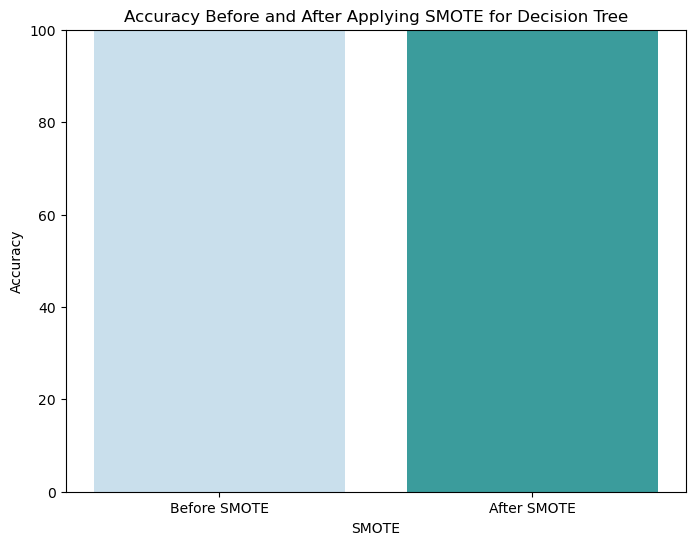

In [55]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a classifier without SMOTE
dt_no_smote = DecisionTreeClassifier(random_state=42)
dt_no_smote.fit(x_train_scaled, y_train)
y_pred_no_smote = dt_no_smote.predict(x_test_scaled)
accuracy_before_smote = accuracy_score(y_test, y_pred_no_smote)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier with SMOTE
dt_with_smote = DecisionTreeClassifier(random_state=42)
dt_with_smote.fit(x_train_resampled, y_train_resampled)
y_pred_with_smote = dt_with_smote.predict(x_test_scaled)
accuracy_after_smote = accuracy_score(y_test, y_pred_with_smote)

# Create lists for accuracy values and labels
accuracies = [accuracy_before_smote * 100, accuracy_after_smote * 100]
labels = ['Before SMOTE', 'After SMOTE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#C9DFEC', '#3B9C9C'])
plt.xlabel('SMOTE')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Applying SMOTE for Decision Tree')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()


In [56]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = nb.predict(x_test_scaled)

# Calculate accuracy after applying SMOTE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying SMOTE:", accuracy)


Accuracy after applying SMOTE: 0.8246753246753247


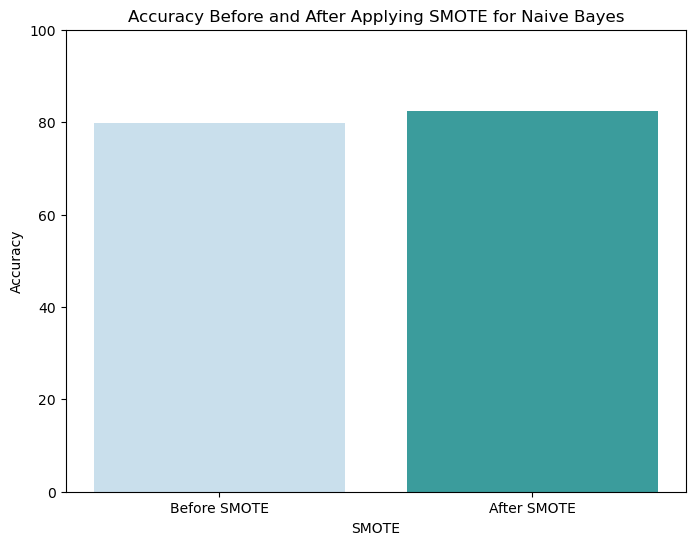

In [57]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a classifier without SMOTE
nb_no_smote = GaussianNB()
nb_no_smote.fit(x_train_scaled, y_train)
y_pred_no_smote = nb_no_smote.predict(x_test_scaled)
accuracy_before_smote = accuracy_score(y_test, y_pred_no_smote)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier with SMOTE
nb_with_smote = GaussianNB()
nb_with_smote.fit(x_train_resampled, y_train_resampled)
y_pred_with_smote = nb_with_smote.predict(x_test_scaled)
accuracy_after_smote = accuracy_score(y_test, y_pred_with_smote)

# Create lists for accuracy values and labels
accuracies = [accuracy_before_smote * 100, accuracy_after_smote * 100]
labels = ['Before SMOTE', 'After SMOTE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#C9DFEC', '#3B9C9C'])
plt.xlabel('SMOTE')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Applying SMOTE for Naive Bayes')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()


In [58]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a k-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = knn.predict(x_test_scaled)

# Calculate accuracy after applying SMOTE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after applying SMOTE:", accuracy)


Accuracy after applying SMOTE: 0.8766233766233766


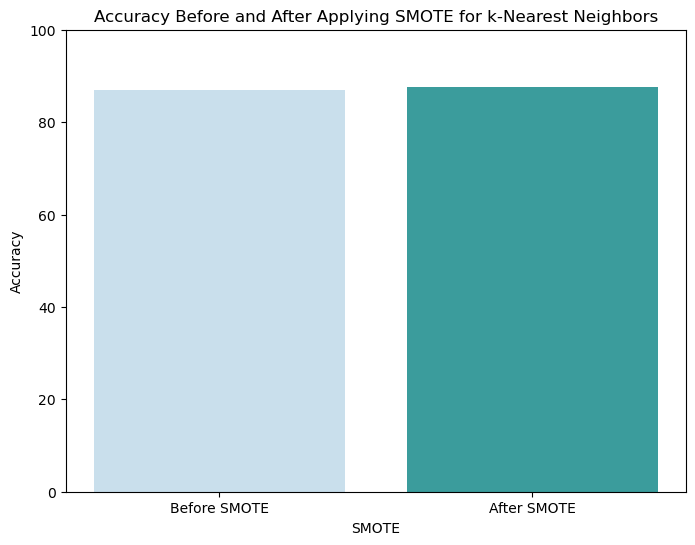

In [59]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a classifier without SMOTE
knn_no_smote = KNeighborsClassifier()
knn_no_smote.fit(x_train_scaled, y_train)
y_pred_no_smote = knn_no_smote.predict(x_test_scaled)
accuracy_before_smote = accuracy_score(y_test, y_pred_no_smote)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train a classifier with SMOTE
knn_with_smote = KNeighborsClassifier()
knn_with_smote.fit(x_train_resampled, y_train_resampled)
y_pred_with_smote = knn_with_smote.predict(x_test_scaled)
accuracy_after_smote = accuracy_score(y_test, y_pred_with_smote)

# Create lists for accuracy values and labels
accuracies = [accuracy_before_smote * 100, accuracy_after_smote * 100]
labels = ['Before SMOTE', 'After SMOTE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#C9DFEC', '#3B9C9C'])
plt.xlabel('SMOTE')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Applying SMOTE for k-Nearest Neighbors')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()


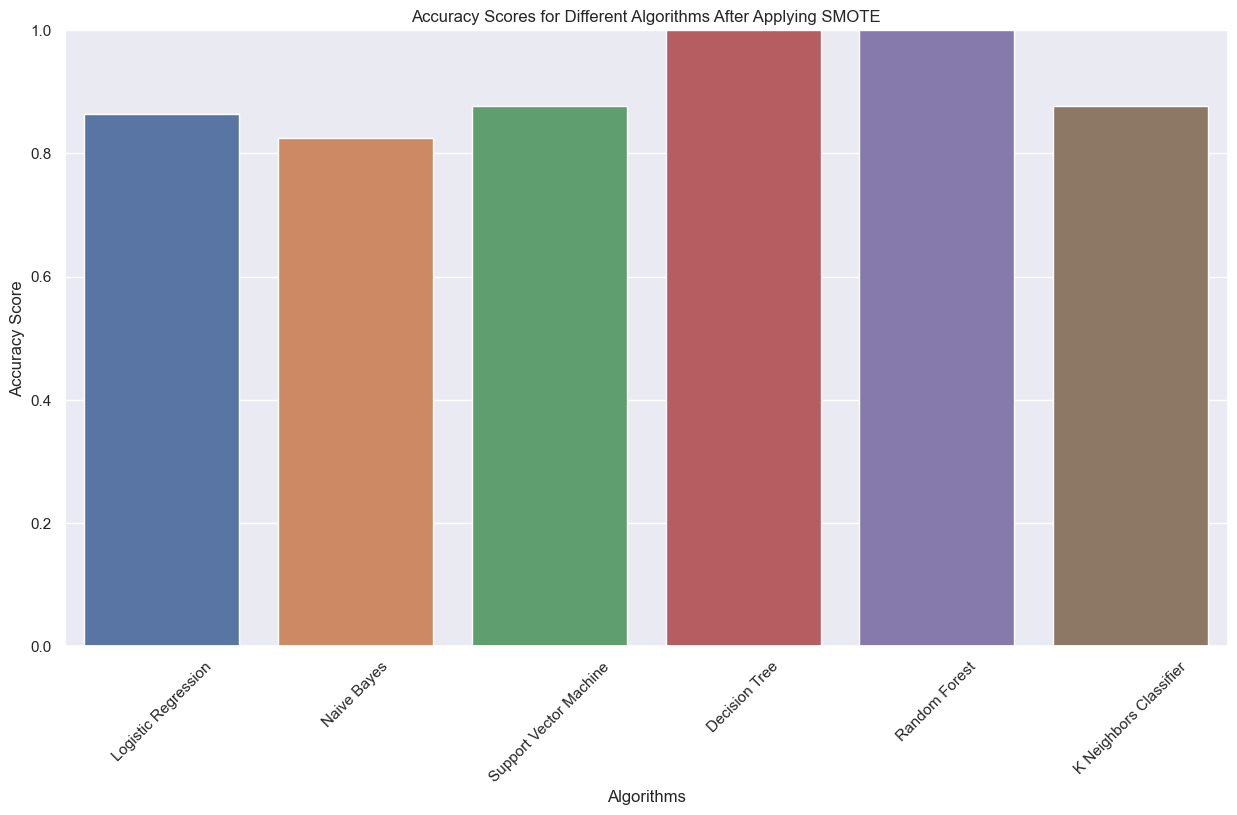

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is stored in a DataFrame called 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target_column' with the name of your target variable
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Train classifiers
lr = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')
nb = GaussianNB()
svm = SVC(kernel='linear', random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

classifiers = {'Logistic Regression': lr,
               'Naive Bayes': nb,
               'Support Vector Machine': svm,
               'Decision Tree': dt,
               'Random Forest': rf,
               'K Neighbors Classifier': knn}

accuracy_scores = {}

for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(x_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = clf.predict(x_test_scaled)
    
    # Calculate accuracy after applying SMOTE
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[clf_name] = accuracy

# Plot the bar graph
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Different Algorithms After Applying SMOTE")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit for better visualization (accuracy ranges from 0 to 1)
plt.show()


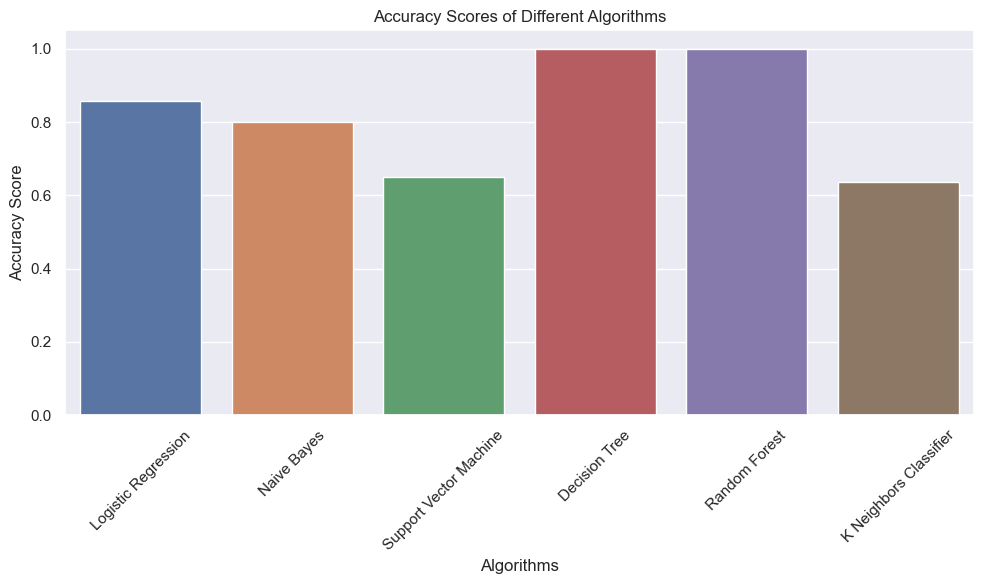

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your features in X and labels in y

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training classifiers
lr = LogisticRegression()
lr.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Calculating accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Storing accuracy scores and algorithm names in lists
scores = [accuracy_lr, accuracy_nb, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_knn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "Decision Tree", "Random Forest", "K Neighbors Classifier"]

# Plotting the bar chart
sns.set(rc={'figure.figsize':(10, 6)})  # Adjust the figure size if needed
sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Algorithms")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [62]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))